## We are going to explore the MNIST digit dataset for one class and

---

multiclass classification problem.
Feel free to experiment and perform comparative analysis with classifiers that we learned in the foundational material, namely :

*   SVM
*   Decision Trees
*   Random Forest
*   KNN
...



Let's set up some basic library imports and solutions directory

In [ ]:
#Enter your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Let's import the dataset we are going to work on.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Time to explore the dataset.


1.   Fetch the rows to analyse shape and size of the dataset.
2.   Try to plot a digit from the dataset for observation.
3.   Let's extend it and print first 100 rows of the dataset for observation.






In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


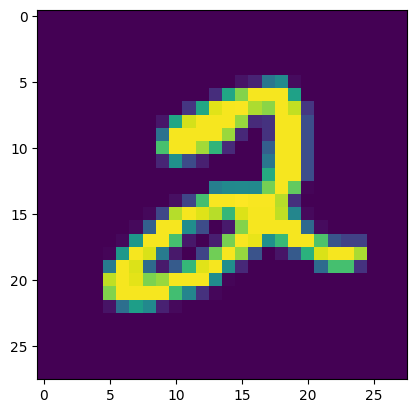

In [ ]:
#Enter your code here
idx = 5
plt.imshow(np.reshape(X[idx], (28, 28)))
print(y[idx])
print(X[0:100])

Write code to split the data into train and test.

In [ ]:
train, test = train_test_split((X, y), test_size=0.2)

In [ ]:
test[0].shape

(70000, 784)

Get a summary of all the features that are present in the dataset

In [ ]:
train.

Finally, let's train the one class classification model for digit == 5 and come up with the following for accuracy estimation.

*   cross-validation
*   confusion matrix
*   precision
*   recall
*   f1-score
*   roc curve








In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
...

Lets expand it to multiclass classification setup for all 10 digits and come up with the following for accuracy estimation.

*   cross-validation
*   confusion matrix
*   precision
*   recall
*   f1-score
*   roc curve


In [ ]:
#Enter your code here